<a href="https://colab.research.google.com/github/QAtester-MM/-----------------------------/blob/master/Crypto_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import zipfile
with zipfile.ZipFile("/content/BitFinexData.zip", "r") as zipf:
  zipf.extractall("/content/bitfinex/")

In [8]:
import pandas as pd
bitcoin = pd.read_csv("/content/bitfinex/Bitfinex_BTCUSD_d.csv", skiprows=1)[1:-750]
bitcoin["date"] = pd.to_datetime(bitcoin["date"])
bitcoin = bitcoin[::-1]
bitcoin = bitcoin.reset_index(drop=True)
bitcoin.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1488240000,2017-02-28,BTC/USD,1195.5,1216.0,1176.6,1189.1,16251499.88,13608.74
1,1488326400,2017-03-01,BTC/USD,1189.1,1236.4,1186.0,1233.2,20165589.45,16589.62
2,1488412800,2017-03-02,BTC/USD,1233.2,1285.9,1212.0,1258.0,26536494.73,21274.82
3,1488499200,2017-03-03,BTC/USD,1258.0,1294.9,1256.2,1289.2,20748814.46,16223.73
4,1488585600,2017-03-04,BTC/USD,1289.2,1291.9,1240.0,1267.8,14131545.81,11156.61


In [9]:
bitcoin.tail()

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
1500,1617840000000,2021-04-08,BTC/USD,55962.000000,58155.0,55714.0,58110.0,2.604657e+08,4482.287596
1501,1617926400000,2021-04-09,BTC/USD,58110.000000,58880.0,57713.0,58134.0,2.179731e+08,3749.493697
1502,1618012800000,2021-04-10,BTC/USD,58134.090643,61243.0,57900.0,59812.0,5.858312e+08,9794.542479
1503,1618099200000,2021-04-11,BTC/USD,59817.073785,60722.0,59308.0,60032.0,2.789436e+08,4646.581998
1504,1618185600000,2021-04-12,BTC/USD,60033.000000,61338.0,59492.0,59874.0,3.291828e+08,5497.925195


In [11]:
bitcoin.shape

(1505, 9)

In [14]:
bitcoin.describe()

,unix,open,high,low,close,Volume USD,Volume BTC
count,1.505000e+03,1505.000000,1505.000000,1505.000000,1505.000000,1.505000e+03,1505.000000
mean,2.873685e+11,10391.204814,10725.169079,10041.485073,10430.163678,1.776724e+08,20334.129265
std,6.142842e+11,10827.948289,11222.174990,10435.903384,10900.643207,2.229820e+08,20744.553716
min,1.488240e+09,942.130000,981.000000,888.200000,942.130000,4.390000e+02,3.079000
25%,1.520726e+09,5234.400000,5376.000000,5055.000000,5238.000000,4.233872e+07,6475.282595
50%,1.553213e+09,7974.400000,8185.000000,7711.000000,7977.850000,9.154748e+07,13149.603522
75%,1.585699e+09,10369.000000,10623.000000,10064.000000,10374.000000,2.204737e+08,27117.630000
max,1.618186e+12,61203.000000,61699.000000,59492.000000,61202.887014,2.223208e+09,189674.010000


In [12]:
bitcoin.describe

<bound method NDFrame.describe of                unix       date   symbol  ...    close    Volume USD    Volume BTC
0        1488240000 2017-02-28  BTC/USD  ...   1189.1  1.625150e+07  13608.740000
1        1488326400 2017-03-01  BTC/USD  ...   1233.2  2.016559e+07  16589.620000
2        1488412800 2017-03-02  BTC/USD  ...   1258.0  2.653649e+07  21274.820000
3        1488499200 2017-03-03  BTC/USD  ...   1289.2  2.074881e+07  16223.730000
4        1488585600 2017-03-04  BTC/USD  ...   1267.8  1.413155e+07  11156.610000
...             ...        ...      ...  ...      ...           ...           ...
1500  1617840000000 2021-04-08  BTC/USD  ...  58110.0  2.604657e+08   4482.287596
1501  1617926400000 2021-04-09  BTC/USD  ...  58134.0  2.179731e+08   3749.493697
1502  1618012800000 2021-04-10  BTC/USD  ...  59812.0  5.858312e+08   9794.542479
1503  1618099200000 2021-04-11  BTC/USD  ...  60032.0  2.789436e+08   4646.581998
1504  1618185600000 2021-04-12  BTC/USD  ...  59874.0  3.291828e

# **Визуализация **

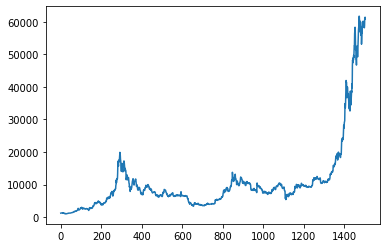

In [16]:
bitcoin["high"].plot()

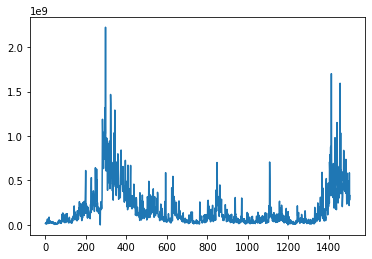

In [17]:
bitcoin["Volume USD"].plot()